In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1200, 1200)


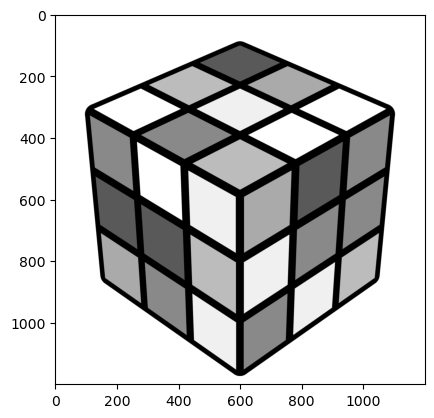

In [6]:
img = cv2.imread('./image/cube.png',0)
print(img.shape)
plt.imshow(img, cmap='grey')
plt.show()

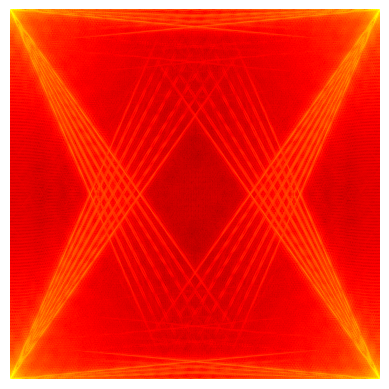

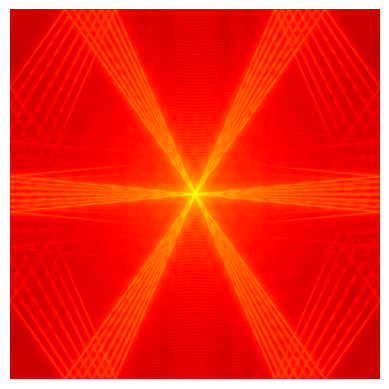

In [19]:
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='hot')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), cmap='hot')
plt.axis('off')
plt.show()

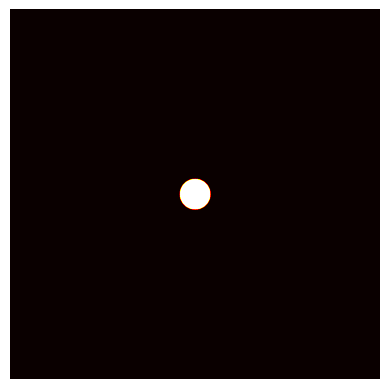

In [20]:
# Filter: Low pass filter
M,N = Fshift.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='grey')
plt.axis('off')
plt.show()

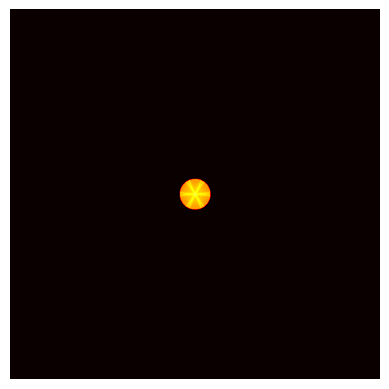

In [21]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), cmap='hot')
plt.axis('off')
plt.show()

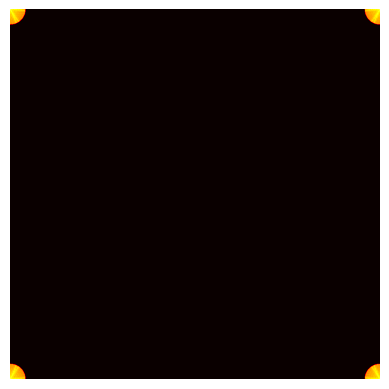

In [22]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), cmap='hot')
plt.axis('off')
plt.show()

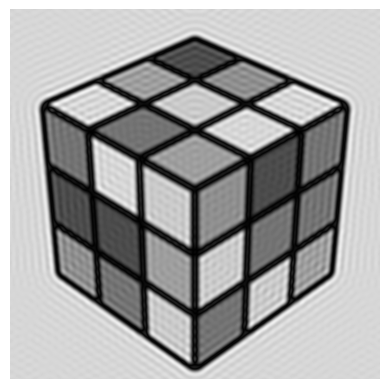

In [23]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

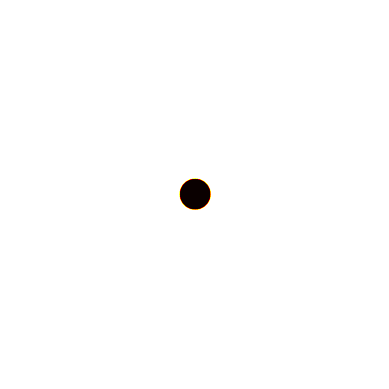

In [24]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='hot')
plt.axis('off')
plt.show()


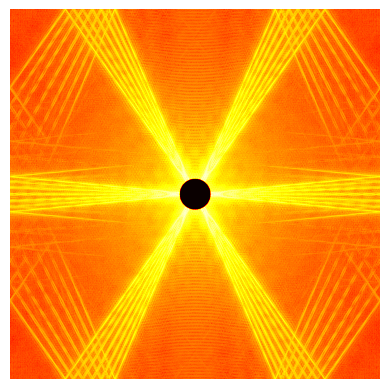

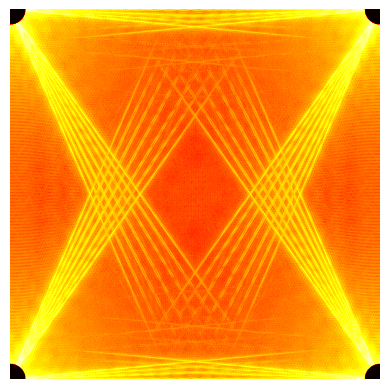

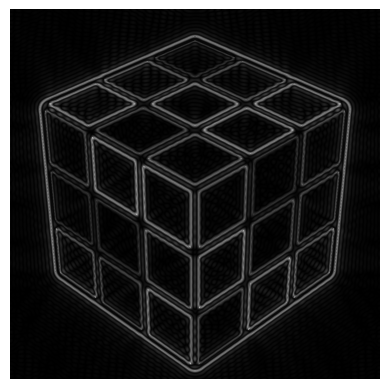

In [26]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), cmap='hot')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), cmap='hot')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()